In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# define function for processing results for cumulative elevation
def process_results(results_filename):
    ds = xr.open_dataset(results_filename)
    dimensions_dict = {ds.density.dims[0]:'time',ds.density.dims[1]:'cell'}
    ds = ds.rename_dims(dimensions_dict)
    year_data = ds.isel(cell=0).density.data
    ds = ds.assign_coords(year = ('time',year_data))
    ds = ds.isel(cell=slice(1,None))
    ds['cumulative_elevation']=ds.DIP[:,6]
    ds['FAC']=ds.DIP[:,7]
    return(ds)

In [3]:
experiment_path = '/home/jez/Community_Firn_Model_Forked/SpinUp_Sensitivity_Example/'

results_ds = process_results(f'{experiment_path}results/CFMresults.hdf5')
nosublim_results_ds = process_results(f'{experiment_path}results/no_sublim/CFMresults.hdf5')

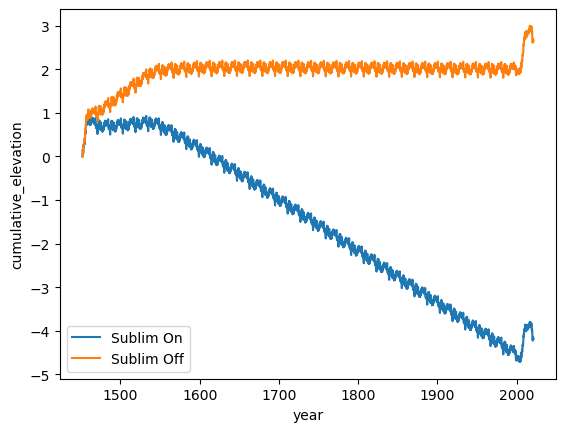

In [4]:
results_ds['cumulative_elevation'].plot.line(x='year',label='Sublim On')
nosublim_results_ds['cumulative_elevation'].plot.line(x='year',label='Sublim Off')
plt.legend()

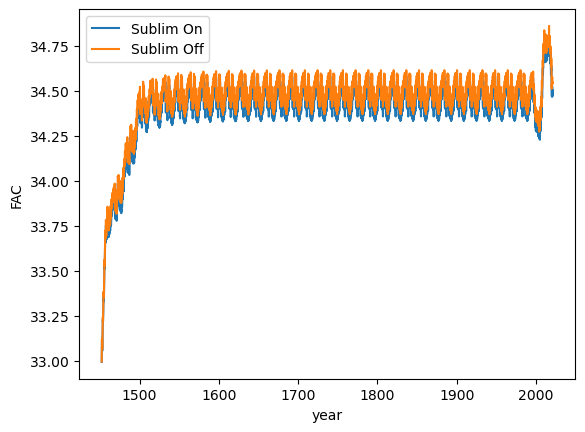

In [5]:
results_ds['FAC'][1:].plot.line(x='year',label='Sublim On')
nosublim_results_ds['FAC'][1:].plot.line(x='year',label='Sublim Off')
plt.legend()

In [6]:
results_ds['FAC Adj'] = results_ds['FAC'] - results_ds['FAC'][1]
nosublim_results_ds['FAC Adj'] = nosublim_results_ds['FAC'] - nosublim_results_ds['FAC'][1]

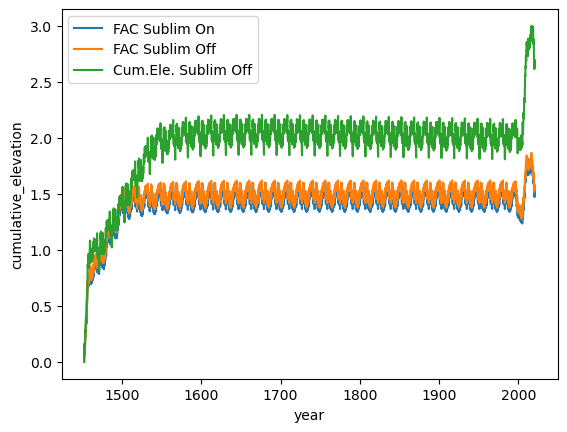

In [7]:
results_ds['FAC Adj'][1:].plot.line(x='year',label='FAC Sublim On')
nosublim_results_ds['FAC Adj'][1:].plot.line(x='year',label='FAC Sublim Off')
nosublim_results_ds['cumulative_elevation'].plot.line(x='year',label='Cum.Ele. Sublim Off')
plt.legend()